<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%ED%8C%8C%EB%A8%B8%EC%99%84_ch6_1~3pg_377~395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. 차원축소

### 01. 차원축소 개요
* 차원축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원 증가->포인트 간의 거리 멀어짐, 희소한 구조
* 피처 수 줄이는 것이 목표

* 차원축소
  * 피처 선택: 데이터 특징을 잘 나타내는 주요 피처만 선택
  * 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출, 함축적인 특성 추출( 잠재적 요소 추출)

* 잠재적 요소를 찾는 차원축소 알고리즘
  * PCA
  * SVD
  * NMF

  

### 02. PCA
* Principal Component Analysis, 대표적인 차원 축소 기법
* 여러 변수 간에 존재하는 상관관계 이용, 주성분을 추출해 차원 축소
* 기존 데이터 정보 유실 최소화를 위해 가장 높은 분산을 가지는 데이터의 축을 찾아 그 축으로 차원을 축소 (=주성분)

* 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
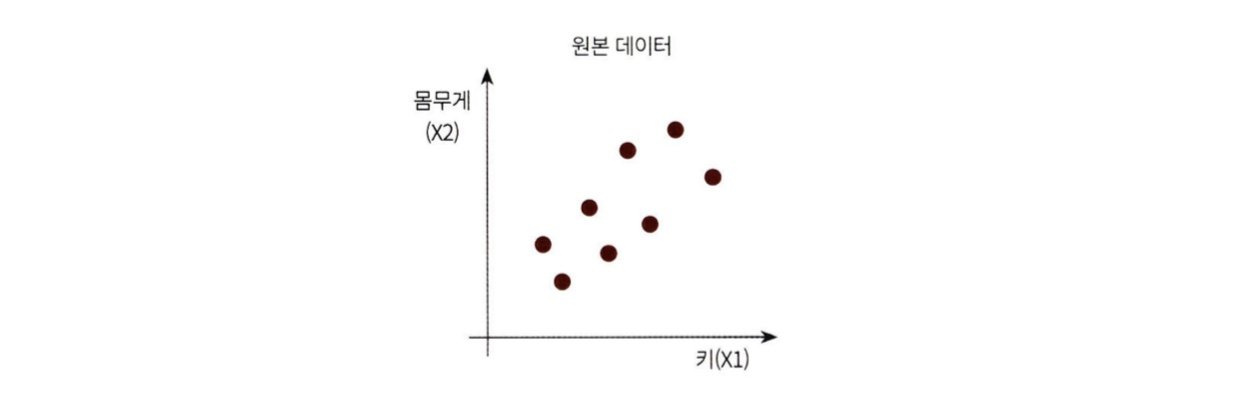

* 차원 축소 과정

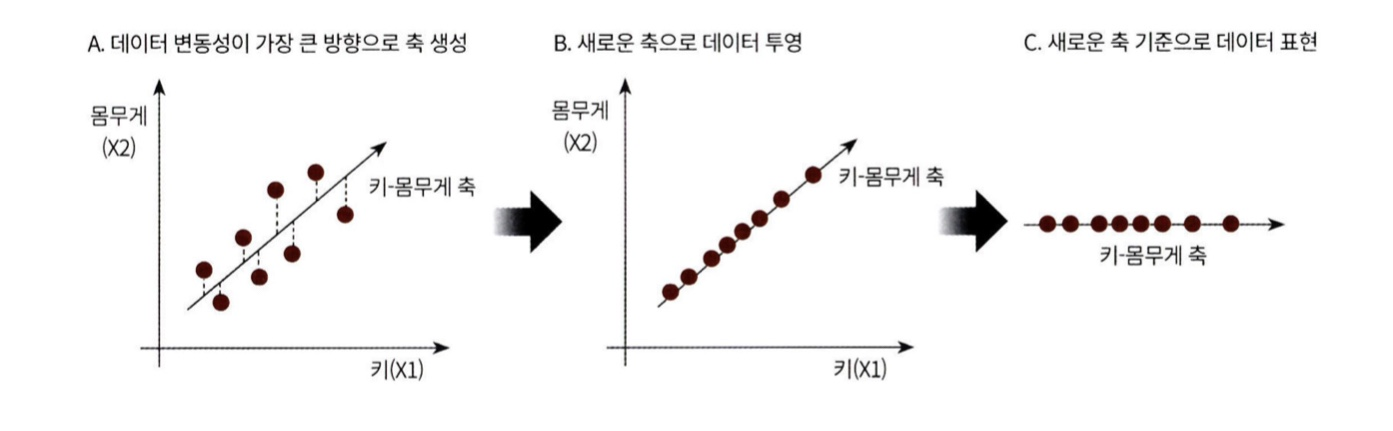

* PCA를 선형대수 관점에서 해석: 입력 데이터의 공분산행렬을 고유값 분해하고 고유벡터에 입력 데이터를 선형 변환하는 것
* 고유벡터=PCA 주성분 벡터(분산 큰 방향)

* 공분산 행렬 C = 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬
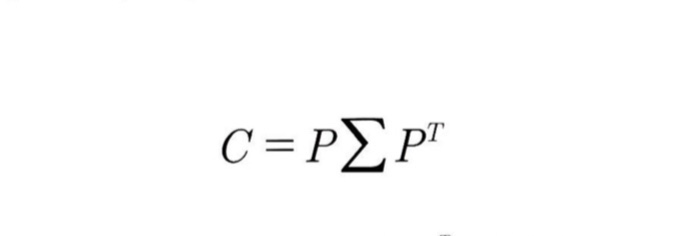
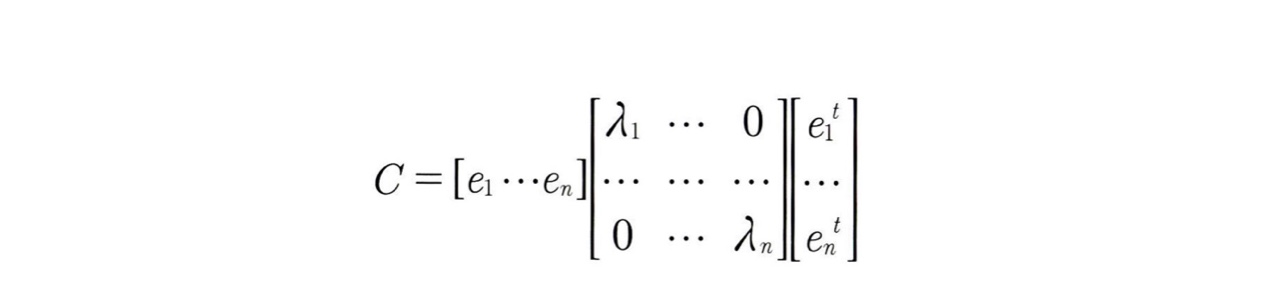
* PCA 단계
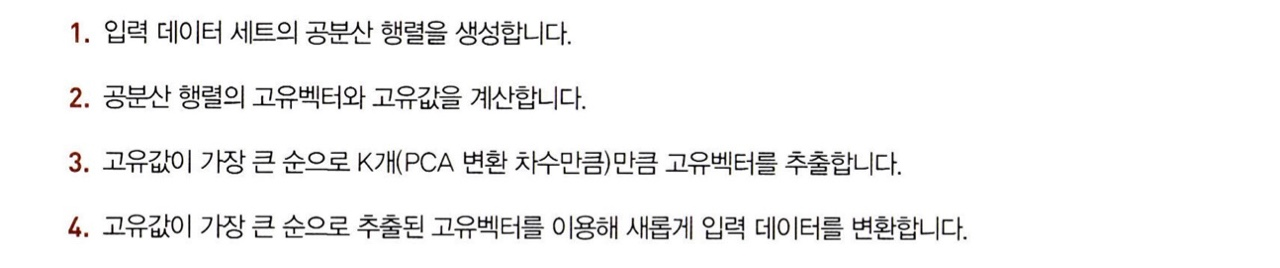

### 붓꽃 데이터 세트 4개의 속성->2개로 압축

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터세트를 판다스 dataframe으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


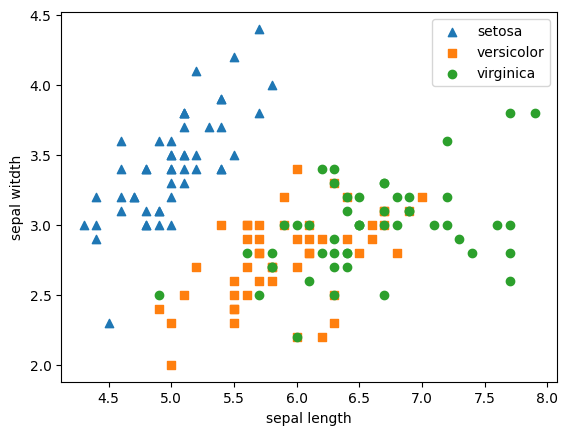

In [3]:
# 2차원으로 시각화
# setosa는 세모,versicolor는 네모, virginica는 동그라미
markers=['^','s','o']

#setosa의 target값은 0, versicolor는1, virginica는 2, 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal witdth')
plt.show()

* Versicolor, Virginica는 조건만으로 분류 어려움
### 스케일 변환 

In [4]:
from sklearn.preprocessing import StandardScaler

#Target값을 제외한 모든 속성값을 StandardScaler를 이용해 표준 정규분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [5]:
# 4차원->3차원
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
#fit()과 transform()을 호출해 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)
     

(150, 2)


In [6]:
#PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)
     

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


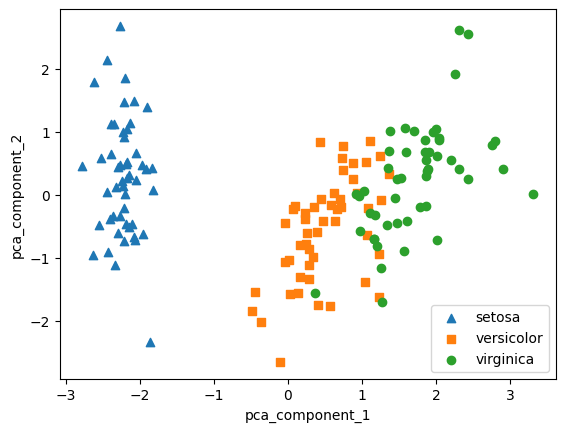

In [7]:
#setosa를 세모 versicolor를 네모 viginica를 동그라미로 표시
markers=['^','s','o']

#pca_componenet_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [8]:
print(pca.explained_variance_ratio_) #변동성의 약 72.9%,22.8%

[0.72962445 0.22850762]


### 원본, PCA 변환 데이터에 각각 분류 적용

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본데이터 교차검증 개별 정확도:',scores)
print('원본데이터 평균정확도:',np.mean(scores))

원본데이터 교차검증 개별 정확도: [0.98 0.94 0.96]
원본데이터 평균정확도: 0.96


In [10]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA변환 데이터 평균정확도:',np.mean(scores_pca))

PCA변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA변환 데이터 평균정확도: 0.88


* 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능 떨어짐

### 신용카드 고객 데이

In [11]:
#header로 의미없는 첫행 제거, iloc로 기존 id제거
import pandas as pd

df=pd.read_excel('credit card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1)

<Axes: >

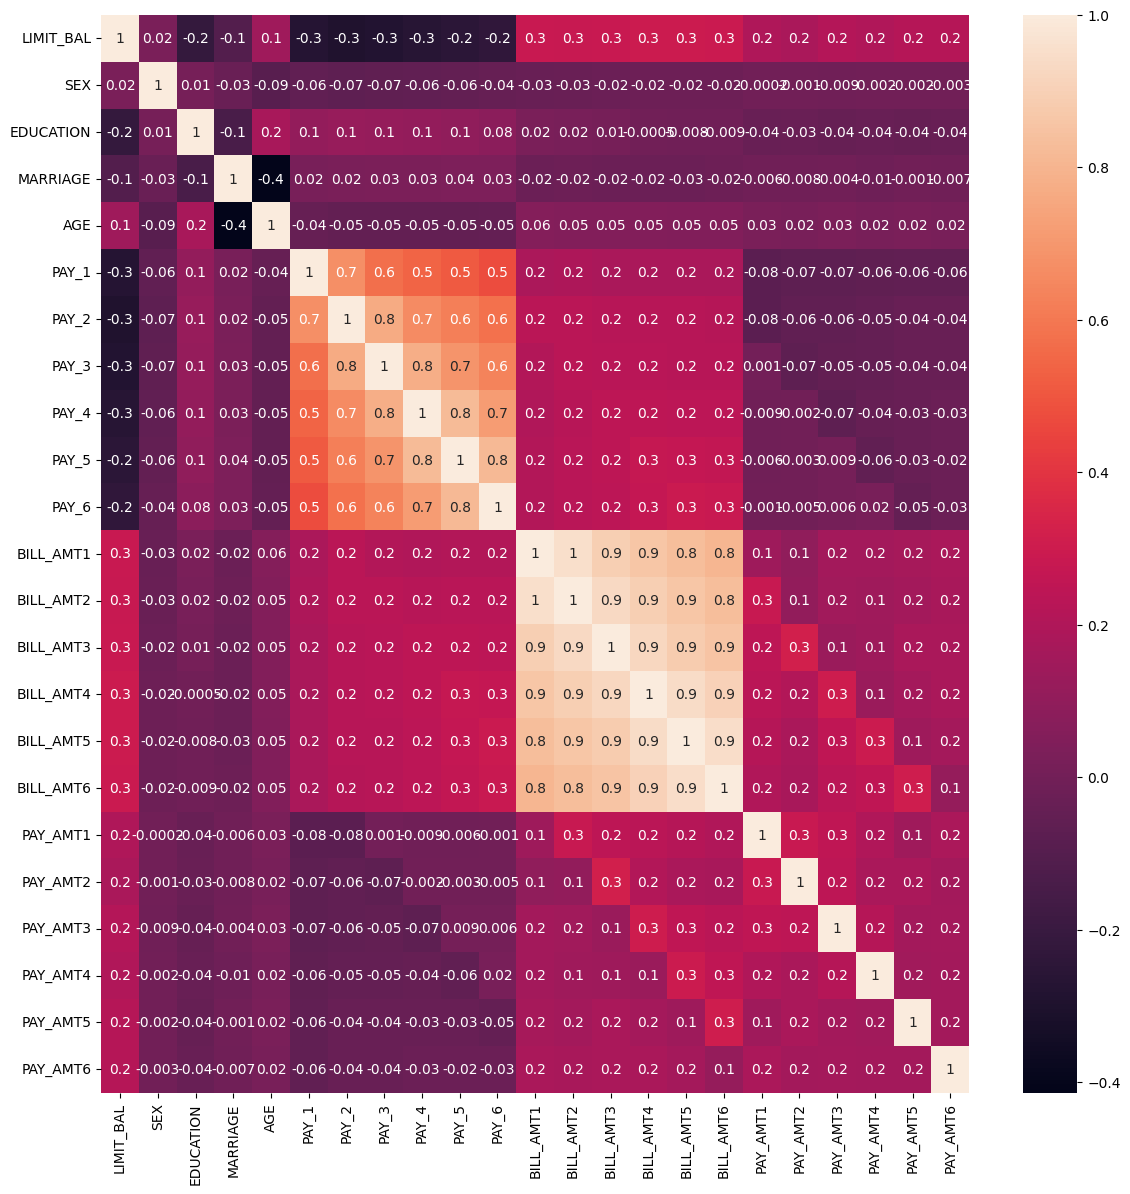

In [14]:
# 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [15]:
# 6개의 속성을 2개로 PCA 변환

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1~BILL_AMT6까지 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

#2개의 PCA속성을 가진 PCA객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


### 원본, PCA 변환 데이터 분류 예측 결과 비교

In [16]:
# 랜덤 포레스트
rcf= RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:',scores)
print('평균정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균정확도:0.8170


In [17]:
# 6개 컴포넌트로 pca변환한 데이터 세트에 대해 동일하게 분류 예측 적용
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 standardscaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca, y_target, scoring='accuracy', cv=3)

print('cv=3 에서서 PCA 변환된 each fold set s accuracy: ', scores_pca)
print('PCA 변환 데이터세트 평균정확도 :{0:.4f}'.format(np.mean(scores_pca)))

cv=3 에서서 PCA 변환된 each fold set s accuracy:  [0.7909 0.7993 0.8028]
PCA 변환 데이터세트 평균정확도 :0.7977


* 1,2% 성능 저하만 발생

### 03.LDA
* Linear Discriminant Analysis, 선형 판별 분석법: 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소 

* 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소 

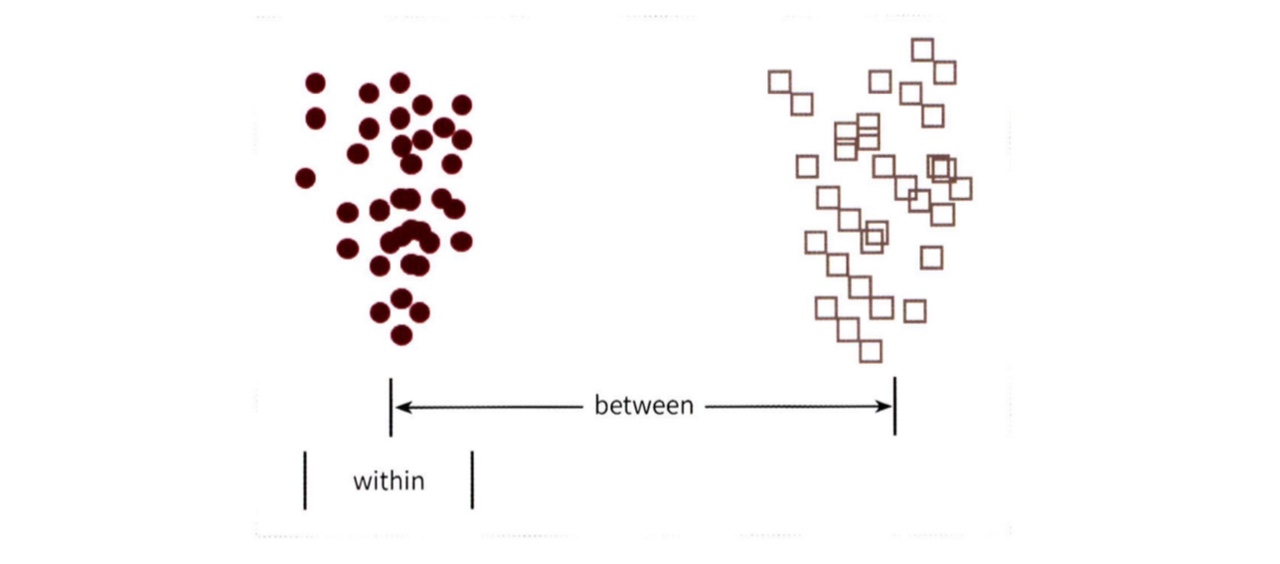
* LDA 단계
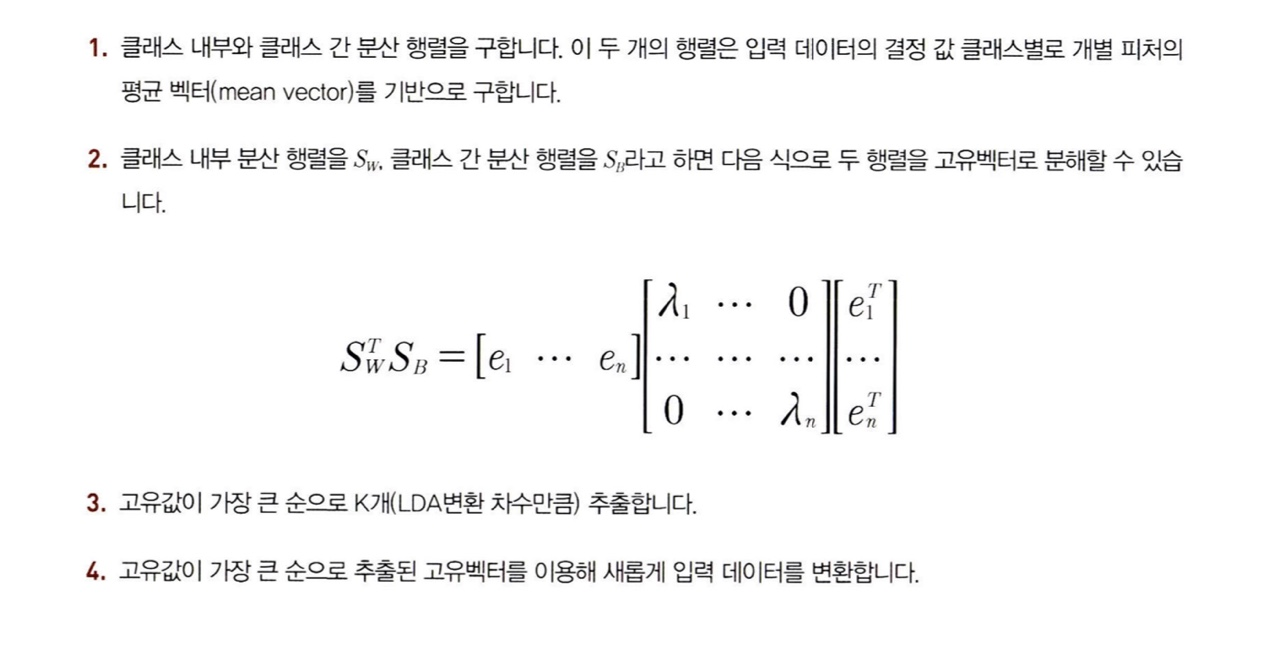

### 붓꽃 데이터 세트 LDA 적용
* 유의점: 지도학습, 클래스 결정 값 필요

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
    

In [20]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 결정값
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


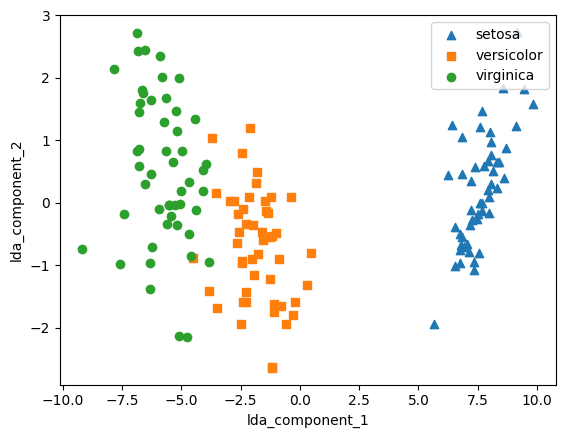

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's','o']
# setosa의 target값은 0, versicolor는1, virginica는 2,각 target별로 다른 모양 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()